# Walkthrough 

This notebook will provide examples on how to use the .py file functions and classes in this repository. 

## How to use Solvents.py

In [1]:
from Solvents import SolventData

In [2]:
dielectric_path = "data archive/dielectric.csv"
solvent_data = SolventData(dielectric_path)
odichlorbenzene_dict = solvent_data.getSolventData("1,2-Dichlorobenzene")
print(odichlorbenzene_dict)

Dielectric constant for 1,2-Dichlorobenzene found in University of Washington's dielectric chart.
{'Solvent': '1,2-Dichlorobenzene', 'Solvent_SMILES': 'Clc1ccccc1Cl', 'Solvent_SMILES_2': nan, 'SOLV_PARAM_s_g': 0.90799, 'SOLV_PARAM_b_g': 0.86727, 'SOLV_PARAM_e_g': 0.12499, 'SOLV_PARAM_l_g': 1.12073, 'SOLV_PARAM_a_g': 0.42881, 'SOLV_PARAM_c_g': -0.85004, 'SOLV_PARAM_abraham err': 0.07, 'SOLV_PARAM_s_h': -9.81485, 'SOLV_PARAM_b_h': -5.48747, 'SOLV_PARAM_e_h': 4.46035, 'SOLV_PARAM_l_h': -9.14429, 'SOLV_PARAM_a_h': -8.69333, 'SOLV_PARAM_c_h': -4.66197, 'SOLV_PARAM_mintz err': 0.31, 'SOLV_PARAM_visc at 298 K (cP)': 1.3272, 'SOLV_PARAM_dielectric constant': 9.93}


## How to use Featurize.py

In [1]:
import Featurize

Say you want experimental data on a solvent, dioxane: 

In [7]:
solvent_name = "dioxane"
experimental_solvent = Featurize.getExperimentalSolvent(solvent_name)
print(experimental_solvent)

# Get a specific value in the dictionary:
solvent_smiles = experimental_solvent["Solvent_SMILES"]
print(f"solvent smiles: {solvent_smiles}")

{'Solvent': 'dioxane', 'Solvent_SMILES': 'C1COCCO1', 'Solvent_SMILES_2': nan, 'SOLV_PARAM_s_g': 1.79, 'SOLV_PARAM_b_g': 0.02, 'SOLV_PARAM_e_g': -0.37, 'SOLV_PARAM_l_g': 0.91, 'SOLV_PARAM_a_g': 2.98, 'SOLV_PARAM_c_g': -0.02, 'SOLV_PARAM_visc at 298 K (cP)': 1.18, 'SOLV_PARAM_dielectric constant': 2.25}
solvent smiles: C1COCCO1


A few examples on how you would use individual feature functions:

In [18]:
# Example monomer: L-Lactide
# define parameters that will be passed into functions
canonical_monomer_smiles = "C[C@@H]1OC(=O)[C@H](C)OC1=O"
dp = 5
solvent_smiles = "C1COCCO1"
monomer_base_state = "s"
polymerization_type = "ROP"

In [14]:
rdkit_features = Featurize.getRdkitDescriptors(canonical_monomer_smiles)
print(f"RDKIT features: {rdkit_features}")
pep = Featurize.getPEP(canonical_monomer_smiles, polymerization_type,dp)
print(f"Enthalpy PEP Feature: {pep}")
solvent_features = Featurize.getSolventFeatures(canonical_monomer_smiles, monomer_base_state, solvent_smiles)
print(f"Solvent features: {solvent_features}")

RDKIT features: {'RDKIT_MaxAbsEStateIndex': 10.650601851851853, 'RDKIT_MaxEStateIndex': 10.650601851851853, 'RDKIT_MinAbsEStateIndex': 0.47953703703703643, 'RDKIT_MinEStateIndex': -0.7465740740740745, 'RDKIT_qed': 0.44398578954674006, 'RDKIT_SPS': 33.0, 'RDKIT_MolWt': 144.12599999999998, 'RDKIT_HeavyAtomMolWt': 136.06199999999998, 'RDKIT_ExactMolWt': 144.042258736, 'RDKIT_NumValenceElectrons': 56, 'RDKIT_NumRadicalElectrons': 0, 'RDKIT_MaxPartialCharge': 0.3474957553971189, 'RDKIT_MinPartialCharge': -0.4479149703022866, 'RDKIT_MaxAbsPartialCharge': 0.4479149703022866, 'RDKIT_MinAbsPartialCharge': 0.3474957553971189, 'RDKIT_FpDensityMorgan1': 1.0, 'RDKIT_FpDensityMorgan2': 1.3, 'RDKIT_FpDensityMorgan3': 1.6, 'RDKIT_BCUT2D_MWHI': 16.64481001536744, 'RDKIT_BCUT2D_MWLOW': 10.29938649161736, 'RDKIT_BCUT2D_CHGHI': 2.315265141544972, 'RDKIT_BCUT2D_CHGLO': -2.219035522108289, 'RDKIT_BCUT2D_LOGPHI': 2.079846784377933, 'RDKIT_BCUT2D_LOGPLOW': -2.404118729607668, 'RDKIT_BCUT2D_MRHI': 5.8632526607

## Create a .csv with all feature data given you have a .csv with monomer strings

In [1]:
import pandas as pd
import numpy as np
import os
import Featurize

In [2]:
# path to .csv file will monomer data that you want to featurize
infile_path = "monomer data build/entropy.csv"

filename = os.path.splitext(os.path.basename(infile_path))[0]
directory_path = os.path.dirname(infile_path)

new_file_name = "featurized_" +  filename + ".csv"
featurized_path = directory_path + "/" + new_file_name
print(featurized_path)

# dH or dS
target = "dS"

monomer data build/featurized_entropy.csv


In [3]:
# If getAllFeatures doesn't seem to be working, make sure that your pandas df is indexed. If it is not uncomment the below code: 

# import pandas as pd

# infile_path = "data archive/dielectric.csv"
# # Read the CSV file
# df = pd.read_csv(infile_path)

# # Add an index column
# df_reset = df.reset_index()

# # Save the DataFrame to a new CSV file
# df_reset.to_csv(infile_path, index=False)

In [4]:
# choose a degree of polymerization
dp = 5

# turn .csv into a pandas dataframe
unfeaturized_df = pd.read_csv(infile_path, index_col=0, encoding="utf-8")

featurized_df = np.nan

for index,row in unfeaturized_df.iterrows():
    #  get the parameter data
    canonical_monomer_smiles = row["Canonical SMILES"]
    print(f"Featurizing {canonical_monomer_smiles}")

    #  get the monomer and polymer base states
    base_state = row["BASE_State"]
    monomer_base_state_col = base_state[0]
    poly_base_state_col = base_state[1:]

    # get the parameters that will go into getAllFeatures
    solvent_name = row["Solvent"]
    # print(solvent_name)
    monomer_base_state = monomer_base_state_col
    polymerization_type = row["BASE_Category"]

    update_dict = Featurize.getAllFeatures(canonical_monomer_smiles, monomer_base_state, polymerization_type, dp, solvent_name, target)
    if target == "dH":
        update_dict["dH (KJ/mol)"] = row["dH (KJ/mol)"]
    else:
        update_dict["dS (J/mol/K)"] = row["dS (J/mol/K)"]

    update_dict["BASE_Polymer_State"] = poly_base_state_col

    if index ==0:
        featurized_df = pd.DataFrame([update_dict])
        featurized_df.to_csv(featurized_path, encoding='utf-8-sig')

    # Update the DataFrame containing featurized data
    featurized_df.loc[len(featurized_df)] = update_dict

    # Update the csv by overwriting latest version
    featurized_df.to_csv(featurized_path, encoding='utf-8-sig')

print("OPERATION COMPLETE :)")

Featurizing CCC1(CC)CCCOC1=O


[13:41:00] DEPRECATION WARNING: please use MorganGenerator
[13:41:00] DEPRECATION WARNING: please use MorganGenerator
1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CCCC1(CCC)CCCOC1=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CCCCC1(CCCC)CCCOC1=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CCCCCC1(CCCCC)CCCOC1=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CCCCCCC1(CCCCCC)CCCOC1=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1CCCCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CCCCCC1CCCC(=O)O1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC1CCCC(=O)O1


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1CCCCCO1


1 molecule converted
1 molecule converted


Featurizing C1=CCC(COCc2ccccc2)C1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1=CCC(OCc2ccccc2)C1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1=CCCC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC(C)(C)[Si](C)(C)OC1CC=CC1


1 molecule converted


Featurizing COC(=O)C1CC=CC1


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C(O)C1CC=CC1


1 molecule converted
1 molecule converted


Featurizing O=C(OCc1ccccc1)C1CC=CC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing OC1CC=CC1


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


Featurizing OCC1CC=CC1


1 molecule converted
1 molecule converted


Featurizing C=C(C)C(=O)Oc1c(C)cccc1C


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC1CC(=O)OCC(C)(C)C1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1COCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CCCCC1(CCCC)OC2CC/C=C\CCC2O1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1COCCO1


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1NCCCO1


1 molecule converted
1 molecule converted


Featurizing C=O


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing O=C1COCCO1


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC(C)=S


1 molecule converted
1 molecule converted


Featurizing O=C1C=C(c2ccccc2)C(=O)N1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC1CCCCC(=O)N1


1 molecule converted
1 molecule converted
1 molecule converted


CC1CCCCC(=O)N1 does not have a match in archive. Using rxn to calculate repeat unit.
CC1CCCCC(=O)N1 does not have a match in archive. Using rxn to calculate repeat unit.
CC1CCCCC(=O)N1 does not have a match in archive. Using rxn to calculate repeat unit.
Featurizing CC1CCNC(=O)CC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC1CCCCNC1=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1CC2CCCCC2O1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=CCOCC1(CC)COC(=O)OC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=CCOCC1(CC)COC(=O)OC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=CCOCC1(CC)COC(=O)OC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CCCCC1(CCCC)O[C@H]2CC/C=C\CC[C@@H]2O1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1=C\CC[C@@H]2CCC[C@H]2CC/1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1=C\CC[C@@H]2OC3(CCCCC3)O[C@H]2CC/1


*** Open Babel Warning  in CorrectStereoAtoms
  Could not correct 1 stereocenter(s) in this molecule ()
  with Atom Ids as follows: 4
1 molecule converted
*** Open Babel Warning  in CorrectStereoAtoms
  Could not correct 1 stereocenter(s) in this molecule ()
  with Atom Ids as follows: 4
1 molecule converted
*** Open Babel Warning  in CorrectStereoAtoms
  Could not correct 1 stereocenter(s) in this molecule ()
  with Atom Ids as follows: 4
1 molecule converted


Featurizing C1=C\CC[C@@H]2OCO[C@H]2CC/1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1=C\CCC2OC3(CCCCC3)OC2CC/1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1=C\CC[C@@H]2CC[C@H]2CC/1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1CCCCCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing S=C1CCCCCO1


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=CO


1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
O=CO does not have a match in archive. Using rxn to calculate repeat unit.
O=CO does not have a match in archive. Using rxn to calculate repeat unit.
O=CO does not have a match in archive. Using rxn to calculate repeat unit.
Featurizing CC(=O)O


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
CC(=O)O does not have a match in archive. Using rxn to calculate repeat unit.
CC(=O)O does not have a match in archive. Using rxn to calculate repeat unit.
CC(=O)O does not have a match in archive. Using rxn to calculate repeat unit.
Featurizing C1CCOC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC(C)(C)OC(=O)N1CC2CC1C(=O)S2
Polymerization mechanism ROP_N not found for CC(C)(C)OC(=O)N1CC2CC1C(=O)S2.


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing COC(=O)C1CCC(=O)OC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC1(C)CCCOC1=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1=CCC(c2ccccc2)C1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1OCC2CCCCC12


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C[C@@H]1OC(=O)[C@H](C)OC1=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C[C@@H]1OC(=O)[C@H](C)OC1=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C[C@@H]1OC(=O)[C@H](C)OC1=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC(C)[C@@H]1CC[C@@H](C)CC1=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC1CCC(=O)OC1


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC1CCCC(=O)O1


1 molecule converted
1 molecule converted


Featurizing CC1CCCC(=O)O1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC1CCCOC1=O


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC1OCCOC1=O


1 molecule converted
1 molecule converted


Featurizing CCC1CCCC(=O)O1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CCCC1CCCC(=O)O1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CCCCC1CCCC(=O)O1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CCCCCC1CCCC(=O)O1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CCCCCC1CCCC(=O)O1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CCCCCCC1CCCC(=O)O1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CCCCCCCC1CCCC(=O)O1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CCCCCCCCCC1CCCC(=O)O1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1CCCCCO1


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1CCCCO1


1 molecule converted
1 molecule converted


Featurizing O=C1CCCO1


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1CCO1


1 molecule converted
1 molecule converted


Featurizing CC1(C)Oc2ccccc2COC1=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC1OCCOC1=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC1CC(C(C)C)CC(=O)O1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC1CCC(C(C)C)OC(=O)C1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=C(F)F


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
C=C(F)F does not have a match in archive. Using rxn to calculate repeat unit.
C=C(F)F does not have a match in archive. Using rxn to calculate repeat unit.
C=C(F)F does not have a match in archive. Using rxn to calculate repeat unit.
Featurizing C=Cc1ccccc1


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=Cc1ccccc1


1 molecule converted
1 molecule converted


Featurizing C=Cc1ccccc1


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=Cc1ccccc1


1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C=COC(C)=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing COC1CCCSc2ccc([N+](=O)[O-])cc2C1
Polymerization mechanism misc not found for COC1CCCSc2ccc([N+](=O)[O-])cc2C1.


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1COCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1OC2C=CCC1C2


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1OC2C=CCC1C2


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1OC2C=CCC1C2


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1OC2C=CCC1C2


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1CCCO1


1 molecule converted
1 molecule converted


Featurizing O=C1CCCCO1


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CCCC=O


1 molecule converted
1 molecule converted


Featurizing O=Cc1ccccc1C=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC1OCCC(=O)O1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1N[C@H]2CCC[C@@H]1O2


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CN1[Si](C)(C)O[Si](C)(C)O[Si]1(C)C
CN1[Si](C)(C)O[Si](C)(C)O[Si]1(C)C cannot be polymerized using cyclic.


1 molecule converted


Featurizing CC(C)=O


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C=C(NC(C)=O)C(=O)OC1CC(C)CCC1C(C)C


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CCCCC#Cc1cc(C=O)c(C=O)cc1C#CCCCC
Polymerization mechanism misc not found for CCCCC#Cc1cc(C=O)c(C=O)cc1C#CCCCC.


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CCCCCCCCN1C(=O)c2cc(C=O)c(C=O)cc2C1=O
Polymerization mechanism misc not found for CCCCCCCCN1C(=O)c2cc(C=O)c(C=O)cc2C1=O.


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing COC(=O)c1cc(C=O)c(C=O)cc1C(=O)OC
Polymerization mechanism misc not found for COC(=O)c1cc(C=O)c(C=O)cc1C(=O)OC.


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=Cc1c(F)c(F)c(F)c(F)c1C=O
Polymerization mechanism misc not found for O=Cc1c(F)c(F)c(F)c(F)c1C=O.


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=Cc1ccccc1C=O
Polymerization mechanism misc not found for O=Cc1ccccc1C=O.


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=CCOCCOCCOCCOC(=O)NC1C(=O)SC1(C)C
C=CCOCCOCCOCCOC(=O)NC1C(=O)SC1(C)C cannot be polymerized using ROP_N.


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1S[C@@H]2CC[C@H]1C2


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1O[C@H]2CCC[C@@H]1C2


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1OC2CCCC1C2


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C[Si](C)(C)OC1C=CCC1


1 molecule converted


Featurizing CC(C)(C)[Si](C)(C)OC1C=CCC1


1 molecule converted


Featurizing CC[Si](CC)(CC)OC1C=CCC1


1 molecule converted


Featurizing C[C@@H]1OC(=O)[C@H](C)OC1=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C[C@@H]1OC(=O)[C@H](C)OC1=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C[C@@H]1OC(=O)[C@H](C)OC1=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C[C@@H]1OC(=O)[C@H](C)OC1=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C[C@@H]1OC(=O)[C@H](C)OC1=O


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC1CCCSC1=O


1 molecule converted
1 molecule converted


Featurizing CC1SCCSC1=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1CCCCS1


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1CSCCS1


1 molecule converted
1 molecule converted


Featurizing CC1SC(=O)C(C)SC1=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing COC(=O)C1C(C(=O)OC)[C@H]2CC/C=C\CC[C@H]12


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1[C@@H]2[C@H]3CC/C=C\CC[C@@H]3[C@@H]2C(=O)N1c1ccccc1


*** Open Babel Warning  in CorrectStereoAtoms
  Could not correct 3 stereocenter(s) in this molecule ()
  with Atom Ids as follows: 2 3 11
1 molecule converted
*** Open Babel Warning  in CorrectStereoAtoms
  Could not correct 3 stereocenter(s) in this molecule ()
  with Atom Ids as follows: 2 3 11
1 molecule converted
*** Open Babel Warning  in CorrectStereoAtoms
  Could not correct 3 stereocenter(s) in this molecule ()
  with Atom Ids as follows: 2 3 11
1 molecule converted


Featurizing O=C1CCCCCCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C[C@@H]1OC(=O)[C@H](C)OC1=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C[C@@H]1OC(=O)[C@H](C)OC1=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C[Si](C)(C)OP1(=O)OCCCO1


1 molecule converted


Featurizing C[Si]1(C)C[Si](C)(C)C1


1 molecule converted


Featurizing C[Si]1(C)CCC1


1 molecule converted


Featurizing C[Si]1(C)CCC1


1 molecule converted


Featurizing C[Si]1(C)O[Si](C)(C)O[Si](C)(C)O[Si](C)(C)O1


1 molecule converted


Featurizing C[Si]1(C)O[Si](C)(C)O[Si](C)(C)O[Si](C)(C)O1


1 molecule converted


Featurizing C[Si]1(C)O[Si](C)(C)O[Si](C)(C)O[Si](C)(C)O1


1 molecule converted


Featurizing C[Si]1(C)O[Si](C)(C)O[Si](C)(C)O1


1 molecule converted


Featurizing C[Si]1(C)O[Si](C)(C)O[Si](C)(C)O1


1 molecule converted


Featurizing C[Si]1(c2ccccc2)CCC1


1 molecule converted


Featurizing C[Si](C)(C)C1CC2C=CC1C2


1 molecule converted


Featurizing C[Si](C)(C)C1CC2C=CC1C2


1 molecule converted


Featurizing C[Si](C)(C)C1CC2C=CC1C2


1 molecule converted


Featurizing C[Si](C)(C)C1CC2C=CC1C2


1 molecule converted


Featurizing C[Si](C)(C)C1CC2C=CC1C2


1 molecule converted


Featurizing C[Si](C)(C)C1CC2C=CC1C2


1 molecule converted


Featurizing C/C=C/C


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C/C=C/C


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C/C=C/C


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C/C=C/C


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C/C=C/C


1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C/C=C/C


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C/C=C/C


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C/C=C/C


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C/C=C/C


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C/C=C/C


1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C/C=C/C


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C/C=C/C(C)C


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C/C=C/C(C)C


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C/C=C/C(C)C


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C/C=C/C(C)C


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C/C=C/C(C)C


1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C/C=C/C(C)C


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C/C=C/C(C)C


1 molecule converted
1 molecule converted


Featurizing C/C=C/CC


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C/C=C/CC


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C/C=C/CC


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C/C=C/CC


1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C/C=C/CC


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C/C=C/CC


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C/C=C/CC


1 molecule converted
1 molecule converted


Featurizing C/C=C/CC


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C/C=C\C


1 molecule converted
1 molecule converted


Featurizing C/C=C\C


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C/C=C\C


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C/C=C\C


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C/C=C\C


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C/C=C\C


1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C/C=C\C


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C/C=C\C


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C/C=C\C


1 molecule converted
1 molecule converted


Featurizing C/C=C\C


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C/C=C\C


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C/C=C\C(C)C


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C/C=C\C(C)C


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C/C=C\C(C)C


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C/C=C\C(C)C


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C/C=C\C(C)C


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C/C=C\C(C)C


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C/C=C\C(C)C


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C/C=C\CC


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C/C=C\CC


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C/C=C\CC


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C/C=C\CC


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C/C=C\CC


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C/C=C\CC


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C/C=C\CC


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C/C=C\CC


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=C


1 molecule converted
1 molecule converted


Featurizing C=C


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=C


1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C=C


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C=C


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C=C


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C=C
Polymerization mechanism Vinyl not found for C=C.


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C=C


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C=C


1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C=C


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C=C


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C=C


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C=C


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C=C


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C=CCC


1 molecule converted
1 molecule converted


Featurizing C=CCC


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=CCC


1 molecule converted
1 molecule converted


Featurizing C=CCC


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=CCC


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C=CCC


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C=CCC


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C=CCC


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=CCC


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=CCC


1 molecule converted
1 molecule converted


Featurizing C=CCC


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C=CCC


1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C=CCC


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C=C(C)C(=O)OC


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=C(C)C(=O)OC


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=C(C)C(=O)OC


1 molecule converted
1 molecule converted


Featurizing C=C(C)C(=O)OC


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=C(C)C(=O)OC


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=C(C)C(=O)OC


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=C(C)C(=O)OC


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=C(C)C(=O)OC


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=C(C)C(=O)OC


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=C(C)C(=O)OC


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=C(C)C(=O)OC


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=C(C)C(=O)Oc1ccccc1C(=O)O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=C(C)C(=O)Oc1ccccc1C(=O)O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=C(C)C(=O)Oc1ccccc1C(=O)O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=C(C)C(=O)Oc1ccccc1C(=O)O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=C(C)C(=O)OCC


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=C(C)C#N


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=C(C)c1ccc2ccccc2c1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=C(C)c1ccc2ccccc2c1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=C(C)c1ccccc1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=C(C)c1ccccc1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=C(C)c1ccccc1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=C(C)c1ccccc1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=C(C)c1ccccc1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=C(C)c1ccccn1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=C(C)c1ncco1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=C(C)c1nccs1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=C(CC)C(=O)OC


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=C(Cl)Cl


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=C(Cl)Cl


1 molecule converted
1 molecule converted


Featurizing C=C(Cl)Cl


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C=C(Cl)Cl


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C=C(Cl)Cl


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C=C(Cl)Cl


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C=C(Cl)Cl


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=C(Cl)Cl


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=C(Cl)Cl


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=C(Cl)Cl


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=C[Si](C)(C)C
Featurizing C=C[Si](C)(C)c1ccccc1


1 molecule converted
1 molecule converted


Featurizing C=C[Si](C)(C)Cc1ccccc1


1 molecule converted


Featurizing C=C[Si](C)(C)Cc1ccccc1


1 molecule converted


Featurizing C=C[Si](C)(C)Cc1ccccc1


1 molecule converted


Featurizing C=C1CCCOC1=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=CC


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C=CC


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=CC


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=CC


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=CC


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C=CC


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C=CC


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=CC(=C)C
Polymerization mechanism misc not found for C=CC(=C)C.


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=CC(=O)OCC


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=CC(=O)OCC


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=CC(=O)OCC


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=CC(=O)OCC


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CCCCCCCCCCOC(=O)C=C


1 molecule converted
1 molecule converted
1 molecule converted


CCCCCCCCCCOC(=O)C=C does not have a match in archive. Using rxn to calculate repeat unit.
CCCCCCCCCCOC(=O)C=C does not have a match in archive. Using rxn to calculate repeat unit.
CCCCCCCCCCOC(=O)C=C does not have a match in archive. Using rxn to calculate repeat unit.
Featurizing CCCCCCCCCCOC(=O)C=C


1 molecule converted
1 molecule converted
1 molecule converted


CCCCCCCCCCOC(=O)C=C does not have a match in archive. Using rxn to calculate repeat unit.
CCCCCCCCCCOC(=O)C=C does not have a match in archive. Using rxn to calculate repeat unit.
CCCCCCCCCCOC(=O)C=C does not have a match in archive. Using rxn to calculate repeat unit.
Featurizing CCCCCCCCCCOC(=O)C=C


1 molecule converted
1 molecule converted
1 molecule converted


CCCCCCCCCCOC(=O)C=C does not have a match in archive. Using rxn to calculate repeat unit.
CCCCCCCCCCOC(=O)C=C does not have a match in archive. Using rxn to calculate repeat unit.
CCCCCCCCCCOC(=O)C=C does not have a match in archive. Using rxn to calculate repeat unit.
Featurizing CCCCCCCCCCOC(=O)C=C


1 molecule converted
1 molecule converted
1 molecule converted


CCCCCCCCCCOC(=O)C=C does not have a match in archive. Using rxn to calculate repeat unit.
CCCCCCCCCCOC(=O)C=C does not have a match in archive. Using rxn to calculate repeat unit.
CCCCCCCCCCOC(=O)C=C does not have a match in archive. Using rxn to calculate repeat unit.
Featurizing C=CCOCCOC(=O)C=C


1 molecule converted
1 molecule converted
1 molecule converted


C=CCOCCOC(=O)C=C does not have a match in archive. Using rxn to calculate repeat unit.
C=CCOCCOC(=O)C=C does not have a match in archive. Using rxn to calculate repeat unit.
C=CCOCCOC(=O)C=C does not have a match in archive. Using rxn to calculate repeat unit.
Featurizing C=CCOCCOC(=O)C=C


1 molecule converted
1 molecule converted
1 molecule converted


C=CCOCCOC(=O)C=C does not have a match in archive. Using rxn to calculate repeat unit.
C=CCOCCOC(=O)C=C does not have a match in archive. Using rxn to calculate repeat unit.
C=CCOCCOC(=O)C=C does not have a match in archive. Using rxn to calculate repeat unit.
Featurizing C=CCOCCOC(=O)C=C


1 molecule converted
1 molecule converted
1 molecule converted


C=CCOCCOC(=O)C=C does not have a match in archive. Using rxn to calculate repeat unit.
C=CCOCCOC(=O)C=C does not have a match in archive. Using rxn to calculate repeat unit.
C=CCOCCOC(=O)C=C does not have a match in archive. Using rxn to calculate repeat unit.
Featurizing C=CCOCCOC(=O)C=C


1 molecule converted
1 molecule converted
1 molecule converted


C=CCOCCOC(=O)C=C does not have a match in archive. Using rxn to calculate repeat unit.
C=CCOCCOC(=O)C=C does not have a match in archive. Using rxn to calculate repeat unit.
C=CCOCCOC(=O)C=C does not have a match in archive. Using rxn to calculate repeat unit.
Featurizing C=CCOC(=O)C=C


1 molecule converted
1 molecule converted
1 molecule converted


C=CCOC(=O)C=C does not have a match in archive. Using rxn to calculate repeat unit.
C=CCOC(=O)C=C does not have a match in archive. Using rxn to calculate repeat unit.
C=CCOC(=O)C=C does not have a match in archive. Using rxn to calculate repeat unit.
Featurizing C=CCOC(=O)C=C


1 molecule converted
1 molecule converted
1 molecule converted


C=CCOC(=O)C=C does not have a match in archive. Using rxn to calculate repeat unit.
C=CCOC(=O)C=C does not have a match in archive. Using rxn to calculate repeat unit.
C=CCOC(=O)C=C does not have a match in archive. Using rxn to calculate repeat unit.
Featurizing C=CCOC(=O)C=C


1 molecule converted
1 molecule converted
1 molecule converted


C=CCOC(=O)C=C does not have a match in archive. Using rxn to calculate repeat unit.
C=CCOC(=O)C=C does not have a match in archive. Using rxn to calculate repeat unit.
C=CCOC(=O)C=C does not have a match in archive. Using rxn to calculate repeat unit.
Featurizing C=CCOC(=O)C=C


1 molecule converted
1 molecule converted
1 molecule converted


C=CCOC(=O)C=C does not have a match in archive. Using rxn to calculate repeat unit.
C=CCOC(=O)C=C does not have a match in archive. Using rxn to calculate repeat unit.
C=CCOC(=O)C=C does not have a match in archive. Using rxn to calculate repeat unit.
Featurizing C=CCOC(=O)C=C


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


C=CCOC(=O)C=C does not have a match in archive. Using rxn to calculate repeat unit.
C=CCOC(=O)C=C does not have a match in archive. Using rxn to calculate repeat unit.
C=CCOC(=O)C=C does not have a match in archive. Using rxn to calculate repeat unit.
Featurizing C=CC#N


1 molecule converted
1 molecule converted


Featurizing C=CC=C
Polymerization mechanism misc not found for C=CC=C.


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=CC=C
Polymerization mechanism misc not found for C=CC=C.


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=Cc1ccccc1


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C=Cc1ccccc1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=Cc1ccccc1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=Cc1ccccc1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=Cc1ccccc1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=Cc1ccccc1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=Cc1ccccc1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=Cc1ccccc1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=CC1CCCCC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=CC1CCCCC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=CC1CCCCC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=CC1CCCCC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=CC1CCCCC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=CC1CCCCC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=CC1CCCCC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=CC1CCCCC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=CCC(C)C


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=CCC(C)C


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=CCC(C)C


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C=CCC(C)C


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C=CCC(C)C


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C=CCC(C)C


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C=CCC(C)C


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C=CCC(C)C


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C=CCC(C)C


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=CCC(C)C


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=CCC(C)C


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=CCC(C)C


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=CCCC


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=CCCC


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=CCCC


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C=CCCC


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C=CCCC


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=CCCC


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=CCCC


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=CCCC


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=CCCCC


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=CCCCCC


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C=O


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C=O


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C=O


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C1=CC2C(C1)C1CC2C2SSSC12


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1=CC2CCC1C2


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1=CC2CCC1C2


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1=CC2CCC1C2


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1=CC2CCC1C2


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1=Cc2cccc3cccc1c23


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1=CCC1


1 molecule converted
1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C1=CCC1


1 molecule converted
1 molecule converted


Featurizing C1=CCCC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1=CCCC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1=CCCC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1=CCCC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1=CCCC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1=CCCC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1=CCCC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1=CCCC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1=CCCCC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1=CCCCCC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1=CCCCCC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1=CCCCCC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1=CCCCCC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1=CCCCCC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1=CCCCCC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1=CCCCCC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1=CCCCCCC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1=CCCCCCC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1=CCCCCCC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1=CCCCCCC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1=CCCCCCC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1=CCCCCCC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1=CCCCCCC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1CC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1CCC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1CCCC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1CCCCC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1CCCCCC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1CCCCCCC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1CCCOCC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1CCCOCC1


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C1CCOC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1CCOC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1CCOC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1CCOC1


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C1CCOC1


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C1CCOC1


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C1CCOC1


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C1CCOC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1CCOC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1CCOC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1CCOC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1CCOC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1CCOC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1CCOCOC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1CCOCOC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1CCOCOC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1CCOCOC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1CCOCOC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1CCOCOC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1CCOCOC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1CCOCOC1


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C1CCOCOC1


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C1CCOCOC1


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C1CCOCOCC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1CCOCOCC1


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C1CN1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1CO1


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C1COC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1COC1


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C1COCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1COCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1COCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1COCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1COCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1COCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1COCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1COCO1


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C1COCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1COCO1


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C1COCO1


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C1COCO1


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C1COCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1COCOC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1COCOCCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1COCOCCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1COCOCCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1COCOCCO1


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C1COOOO1


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C1COOOO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1OCOCO1


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C1OCOCO1


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C1OCOCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1OCOCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1OCOCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC(=O)CCC=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC(=O)CCC=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC(C)(Cl)C=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC(C)=O


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing CC(C)C=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC(C)C=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC(C)C=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC(C)C1COCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC(Cl)(Cl)C=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC[Si]1(CC)O[Si](CC)(CC)O[Si](CC)(CC)O1


1 molecule converted


Featurizing CC[Si]1(CC)O[Si](CC)(CC)O[Si](CC)(CC)O1


1 molecule converted


Featurizing CC[Si]1(CC)O[Si](CC)(CC)O[Si](CC)(CC)O1


1 molecule converted


Featurizing CC[Si]1(CC)O[Si](CC)(CC)O[Si](CC)(CC)O1


1 molecule converted


Featurizing CC[Si]1(CC)O[Si](CC)(CC)O[Si](CC)(CC)O1


1 molecule converted


Featurizing CC[Si]1(CC)O[Si](CC)(CC)O[Si](CC)(CC)O1


1 molecule converted


Featurizing CC=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC1(C)CC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC1(C)CCC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC1(C)CCCC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC1(C)CCCCC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC1(C)COC(=O)OC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC1(C)COC(=O)OC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC1(C)COC(=O)OC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC1(C)COC(=O)OC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC1(C)COC(=O)OC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC1(C)COC(=O)OC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC1(C)COCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC1CC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC1CCC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC1CCCC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC1CCCCC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC1CCCCNC1=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC1CCCOCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC1CCNC(=O)CC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC1CCOC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC1CO1


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing CC1COCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC1OC(=O)C(C)OC1=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC1OC(=O)C(C)OC1=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC1OCCCCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC1OCCCCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC1OCOC1C


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC1OCOC1C


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CCC=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CCC=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CCC=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CCC=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CCC=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CCC=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CCC=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CCC=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CCC1COCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CCCC=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CCCCC=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CCCCC=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CCCCC1OCCCCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CCCCC1OCCOCCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CCCCCC=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CCCCCC=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CCCCCC=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CCCCCC=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CCCCCC=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CCCCCC=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CCCCCCC=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CCCCCCC=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CCCCCCC=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CCCCCCC=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CCCCCCC=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CCCCCCC=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CCCCCCCC=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CCCCCCCC=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CCCOP1(=O)OCCCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CCOC(=O)C(C#N)c1ccc(C(C#N)C(=O)OCC)c2occc12
CCOC(=O)C(C#N)c1ccc(C(C#N)C(=O)OCC)c2occc12 cannot be polymerized using ROMP.


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CCOP1(=O)OCCCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing ClCC1(CCl)COC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CN1CCCCC1=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CN1CCCCCC1=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CN1CCCCCC1=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CN1CCCCCC1=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing COCCOCCC=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing COCCOCCC=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing COP1(=O)OCCCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing COP1(=O)OCCCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1CCCCCCCCCCCCCCCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1CCCCCCCCCCCCCCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1CCCCCCCCCCCCCCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1CCCCCCCCCCCCCCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1CCCCCCCCCCCCCCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1CCCCCCCCCCCCCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1CCCCCCCCCCCCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1CCCCCCCCCCCCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1CCCCCCCCCCCCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1CCCCCCCCCCCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1CCCCCCCCCCN1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1CCCCCCCCCCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1CCCCCCCCCCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1CCCCCCCCCCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1CCCCCCCCCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1CCCCCCCCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1CCCCCCCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1CCCCCCN1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1CCCCCCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1CCCCCN1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1CCCCCN1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1CCCCCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1CCCCCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1CCCCCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1CCCCN1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1CCCCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1CCCCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1CCCCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1CCCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1CCCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1CCCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1CCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1CCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1CCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1COC(=O)CO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1COC(=O)CO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1COC(=O)CO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1COCCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1COCCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1COCCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1COCCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1COCCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1COCCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1COCCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1CSSCC(=O)O1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1OC2CCC1CC2


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
O=C1OC2CCC1CC2 does not have a match in archive. Using rxn to calculate repeat unit.
O=C1OC2CCC1CC2 does not have a match in archive. Using rxn to calculate repeat unit.
O=C1OC2CCC1CC2 does not have a match in archive. Using rxn to calculate repeat unit.
Featurizing O=C1OC2CCC1CC2


1 molecule converted
1 molecule converted
1 molecule converted


O=C1OC2CCC1CC2 does not have a match in archive. Using rxn to calculate repeat unit.
O=C1OC2CCC1CC2 does not have a match in archive. Using rxn to calculate repeat unit.
O=C1OC2CCC1CC2 does not have a match in archive. Using rxn to calculate repeat unit.
Featurizing O=C1OCCOC1=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1OCCOC1=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1OCCOC1=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1OCCOC1=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=CC(Br)(Br)Br


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=CC(Cl)(Br)Br


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=CC(Cl)(Cl)Br


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=CC(Cl)(Cl)Cl


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=CC(Cl)(Cl)Cl


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=CC(Cl)(Cl)Cl


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=CC(Cl)(Cl)Cl


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=CC(Cl)(Cl)Cl


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=CC(Cl)(Cl)Cl


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=CC(Cl)(Cl)Cl


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=CC(Cl)(Cl)Cl


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=CC(Cl)(Cl)Cl


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing O=CC(Cl)(Cl)Cl


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=CC(F)(Br)Br


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=CC(F)(Cl)Br


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=CC(F)(Cl)Cl


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=CC(F)(F)Br


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=CC(F)(F)Cl


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=CC(F)(F)F


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=CC(F)(F)F


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=CC(F)(F)F


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing O=CC(F)(F)F


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=Cc1ccccc1C=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=P1(O)OCCCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=S1SC2C3CCC(C3)C2S1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=CC(F)(F)F


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CCOC(=O)CCCCC1CCSS1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC1CCCSC(=S)S1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1NC2CCCC1C2


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C1=CCCC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC1CCOC(=O)C1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=C1OC(C)(C(C)C)OC1=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CCOC(=O)C=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing COC(=O)C=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC1(C)COC(=O)OC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC1(c2ccccc2)COC(=O)OC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CCC1(c2ccccc2)COC(=O)OC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CCC1(CC)COC(=O)OC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1OCCCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1OC2CCCCC2O1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=C1CCOC1=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=S1(=O)CCCO1
Polymerization mechanism ROP-S not found for O=S1(=O)CCCO1.


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC1(C)COC(=O)c2ccc(cc2)C(=O)OCC(C)(C)COC(=O)c2ccc(cc2)C(=O)OC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC1COC(=O)c2ccc(cc2)C(=O)OCC(C)COC(=O)c2ccc(cc2)C(=O)OC1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=CC1CCC(=CC)C(=O)O1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CCC1CCC(CC)C(=O)O1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC1(C)OC2CC/C=C\CCC2O1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC1OC2CC/C=C\CCC2O1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing COC(=O)C1C2CC/C=C\CCC2C1C(=O)OC


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1C2C3CC/C=C\CCC3C2C(=O)N1c1ccccc1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC1O[C@H]2CC/C=C\CC[C@@H]2O1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CC1(C)O[C@H]2CC/C=C\CC[C@@H]2O1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing CCCCCCC=O


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing O=C1CCO1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing COC(=O)CCCCC1CCSS1
Polymerization mechanism cyclic not found for COC(=O)CCCCC1CCSS1.


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=C


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C=C


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C=C


1 molecule converted
1 molecule converted
1 molecule converted


No solvent data for monomers with base state 'g'
Featurizing C=CCC


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=C(C)C(=O)OC


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C=C(C)c1ccccc1


1 molecule converted
1 molecule converted
1 molecule converted


Featurizing C[C@@H]1OC(=O)[C@H](C)OC1=O


1 molecule converted
1 molecule converted


OPERATION COMPLETE :)


1 molecule converted


## How to use Polymerize.py

In [ ]:
from Polymerize import Polymerization
import numpy as np
import pandas as pd

In [ ]:
canonical_monomer_smiles = "C[C@@H]1OC(=O)[C@H](C)OC1=O"
polymerization_type = "ROP"
dp = 5

In [ ]:
# add the polymers and solvents to data
polymerize_data = Polymerization(canonical_monomer_smiles, polymerization_type,dp)
print(polymerize_data.main())

{'DP_0': 'C[C@@H]1OC(=O)[C@H](C)OC1=O', 'DP_1': 'C[C@H](O)C(=O)O[C@@H](C)C(=O)C', 'DP_2': 'C[C@H](O)C(=O)O[C@@H](C)C(=O)O[C@@H](C)C(=O)O[C@@H](C)C(=O)C', 'DP_3': 'C[C@H](O)C(=O)O[C@@H](C)C(=O)O[C@@H](C)C(=O)O[C@@H](C)C(=O)O[C@@H](C)C(=O)O[C@@H](C)C(=O)C', 'DP_4': 'C[C@H](O)C(=O)O[C@@H](C)C(=O)O[C@@H](C)C(=O)O[C@@H](C)C(=O)O[C@@H](C)C(=O)O[C@@H](C)C(=O)O[C@@H](C)C(=O)O[C@@H](C)C(=O)C', 'DP_5': 'C[C@H](O)C(=O)O[C@@H](C)C(=O)O[C@@H](C)C(=O)O[C@@H](C)C(=O)O[C@@H](C)C(=O)O[C@@H](C)C(=O)O[C@@H](C)C(=O)O[C@@H](C)C(=O)O[C@@H](C)C(=O)O[C@@H](C)C(=O)C'}


## How to use Impute.py

In [5]:
from Impute import ImputeData

In [6]:
# path to .csv file with monomer feature data
infile_path = "monomer data build/featurized_entropy.csv"
target = "dS"

In [7]:
impute_data = ImputeData(infile_path, target)
impute_data.main()

DIPOLE_gasteiger
DIPOLE_mmff94
DIPOLE_eem2015bm
SOLUTE_PARAM_E_GC
SOLUTE_PARAM_S_GC
SOLUTE_PARAM_A_GC
SOLUTE_PARAM_B_GC
SOLUTE_PARAM_L_GC
SOLUTE_PARAM_V_GC
SOLUTE_PARAM_E_ML
SOLUTE_PARAM_S_ML
SOLUTE_PARAM_A_ML
SOLUTE_PARAM_B_ML
SOLUTE_PARAM_L_ML
SOLUTE_PARAM_V_ML
Imputing Complete
One-hot Encoding Complete
Columns removed: ['RDKIT_fr_Al_COO', 'RDKIT_fr_Al_OH', 'RDKIT_fr_Al_OH_noTert', 'RDKIT_fr_ArN', 'RDKIT_fr_Ar_COO', 'RDKIT_fr_Ar_N', 'RDKIT_fr_Ar_NH', 'RDKIT_fr_Ar_OH', 'RDKIT_fr_COO', 'RDKIT_fr_COO2', 'RDKIT_fr_C_S', 'RDKIT_fr_HOCCN', 'RDKIT_fr_Imine', 'RDKIT_fr_NH0', 'RDKIT_fr_NH1', 'RDKIT_fr_NH2', 'RDKIT_fr_N_O', 'RDKIT_fr_Ndealkylation1', 'RDKIT_fr_Ndealkylation2', 'RDKIT_fr_Nhpyrrole', 'RDKIT_fr_SH', 'RDKIT_fr_alkyl_carbamate', 'RDKIT_fr_alkyl_halide', 'RDKIT_fr_amide', 'RDKIT_fr_amidine', 'RDKIT_fr_aniline', 'RDKIT_fr_aryl_methyl', 'RDKIT_fr_azide', 'RDKIT_fr_azo', 'RDKIT_fr_barbitur', 'RDKIT_fr_benzene', 'RDKIT_fr_benzodiazepine', 'RDKIT_fr_bicyclic', 'RDKIT_fr_diazo', 'RDKIT_f

## How to use Models.py

In [3]:
import Models

In [4]:
infile_path = "/Users/hunter/Downloads/BROADBELT LAB/thermonomer-1/monomer data build/cleaned_encoded_imputed_featurized_entropy.csv"
n_iters = 200
target = "dS (J/mol/K)"

Models.main(infile_path, n_iters, target, get_hyperparams = False, get_models = False)


UNIQUE DATASETS CREATED:
    1: Full + solvent parameters
    2: Full without solvent parameters
    3: Solvents only (with solvent parameters)
    4: Bulk only
RUNNING MODELS FOR DATASET 1
RUNNING XGB
TRAIN XGB LOOCV COMPLETE
TRAIN XGB COMPLETE
RUNNING MODELS FOR DATASET 2
RUNNING XGB
TRAIN XGB LOOCV COMPLETE
TRAIN XGB COMPLETE
RUNNING MODELS FOR DATASET 3
RUNNING XGB
TRAIN XGB LOOCV COMPLETE
TRAIN XGB COMPLETE
RUNNING MODELS FOR DATASET 4
RUNNING XGB
TRAIN XGB LOOCV COMPLETE
TRAIN XGB COMPLETE
OPERATION COMPLETE :)


In [7]:
from rdkit import Chem

canonical_monomer_smiles = "C1=CC=C(C(=C1)Cl)Cl"  

# Convert the SMILES string to a molecule object
molecule = Chem.MolFromSmiles(canonical_monomer_smiles)

# Convert the molecule object back to canonical SMILES
canonical_smiles = Chem.MolToSmiles(molecule, canonical=True)

print("Canonical SMILES:", canonical_smiles)


Canonical SMILES: Clc1ccccc1Cl


In [1]:
import Data

In [4]:
Data.summarizeTrainTestResults("/Users/hunter/Downloads/BROADBELT LAB/thermonomer-1/model_results")

In [5]:
Data.summarizeLOOCVResults("/Users/hunter/Downloads/BROADBELT LAB/thermonomer-1/model_results_LOOCV")

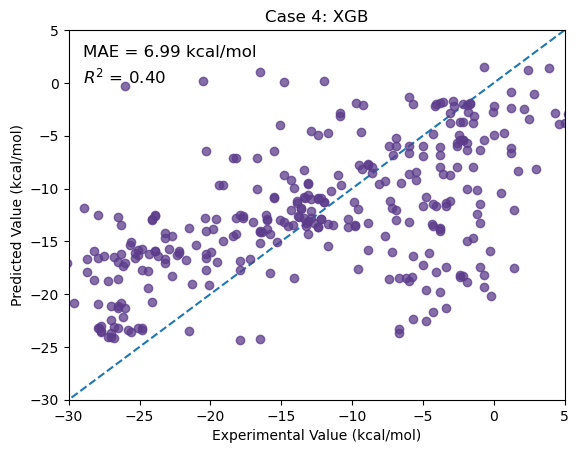

In [7]:
import Data
path = "/Users/hunter/Downloads/BROADBELT LAB/thermonomer-1/model_results_LOOCV/XGB_LOOCV_4.csv"
Data.graphExpPred(path)

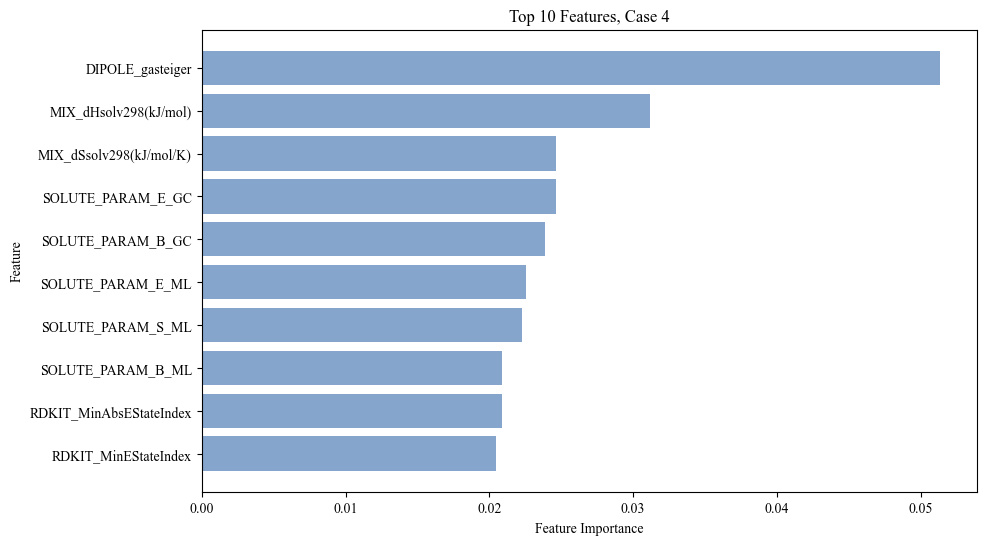

In [11]:
import Data
path = "/Users/hunter/Downloads/BROADBELT LAB/thermonomer-1/final_results/feature_ranking_4.csv"
Data.graphFeatureRanking(path)